In [ ]:
import numpy as np
import matplotlib.pylab as plt

#Por Euler

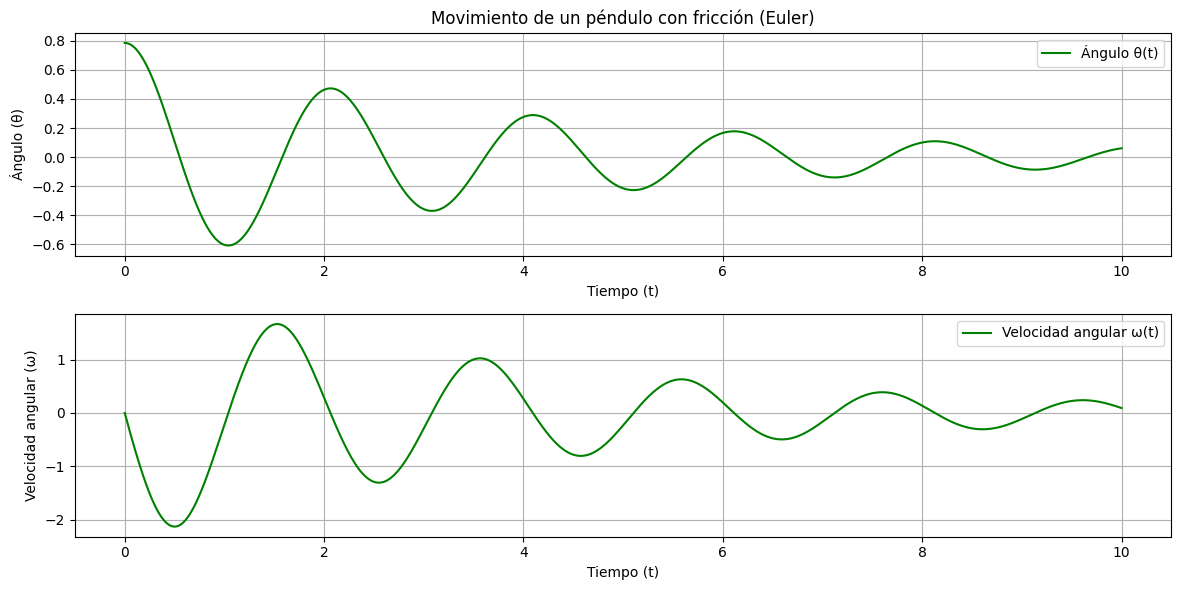

In [ ]:
def euler_method_second_order(f, t0, theta0, omega0, h, n):
    t = np.zeros(n+1)
    theta = np.zeros(n+1)
    omega = np.zeros(n+1)

    t[0] = t0
    theta[0] = theta0
    omega[0] = omega0

    for i in range(n):
        dtheta_dt, domega_dt = f(t[i], theta[i], omega[i])
        theta[i+1] = theta[i] + h * dtheta_dt
        omega[i+1] = omega[i] + h * domega_dt
        t[i+1] = t[i] + h

    return t, theta, omega

# EDO péndulo con fricción
def pendulum_system(t, theta, omega):
    """
    dθ/dt = ω
    dω/dt = -(b/m) * ω - (g/L) * sin(θ)
    """
    b = 0.5  # mu
    m = 1.0  # masa
    g = 9.81  # gravedad
    L = 1.0  # longitud

    dtheta_dt = omega
    domega_dt = -(b/m) * omega - (g/L) * np.sin(theta)

    return dtheta_dt, domega_dt

# ci
t0 = 0.0
theta0 = np.pi / 4  # θ inicial de 45 grados
omega0 = 0.0  # ω inicial

h = 0.002
n = 5000

t, theta_euler, omega_euler = euler_method_second_order(pendulum_system, t0, theta0, omega0, h, n)

# GRÁFICA
plt.figure(figsize=(12, 6))

# θ vs t
plt.subplot(2, 1, 1)
plt.plot(t, theta_euler, label="Ángulo θ(t)", color="green")
plt.xlabel("Tiempo (t)")
plt.ylabel("Ángulo (θ)")
plt.title("Movimiento de un péndulo con fricción (Euler)")
plt.legend()
plt.grid(True)

# ω vs t
plt.subplot(2, 1, 2)
plt.plot(t, omega_euler, label="Velocidad angular ω(t)", color="green")
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad angular (ω)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Por Runge-Kutta

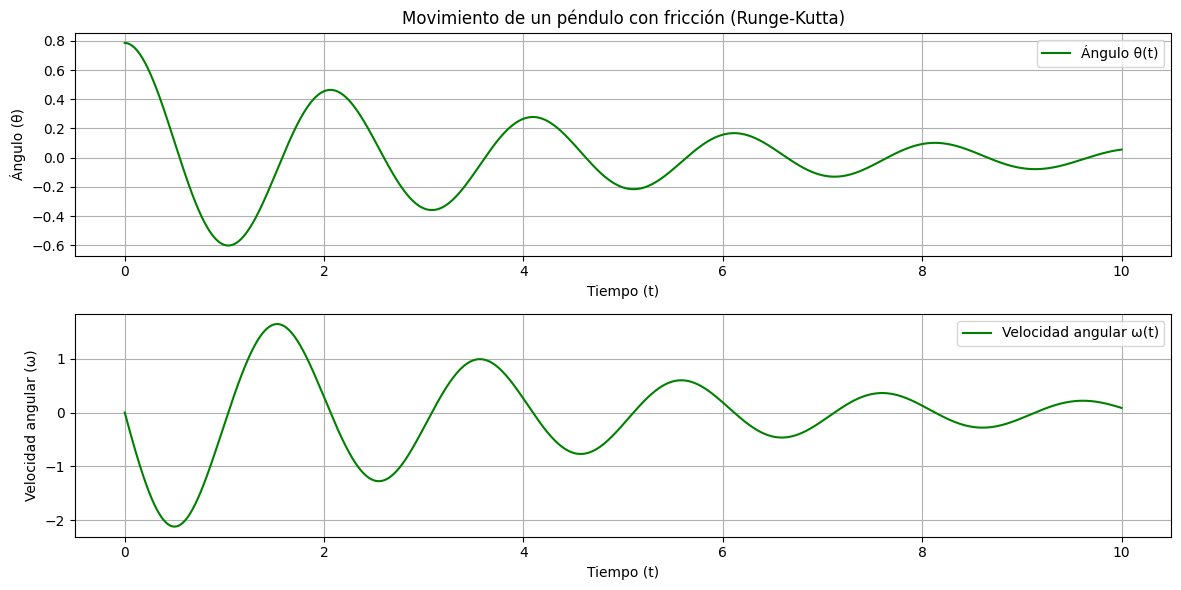

In [ ]:
def runge_kutta_second_order(f, t0, theta0, omega0, h, n):
    t = np.zeros(n+1)
    theta = np.zeros(n+1)
    omega = np.zeros(n+1)

    t[0] = t0
    theta[0] = theta0
    omega[0] = omega0

    for i in range(n):
        k1_theta, k1_omega = f(t[i], theta[i], omega[i])

        k2_theta, k2_omega = f(
            t[i] + h / 2,
            theta[i] + h * k1_theta / 2,
            omega[i] + h * k1_omega / 2
        )

        k3_theta, k3_omega = f(
            t[i] + h / 2,
            theta[i] + h * k2_theta / 2,
            omega[i] + h * k2_omega / 2
        )

        k4_theta, k4_omega = f(
            t[i] + h,
            theta[i] + h * k3_theta,
            omega[i] + h * k3_omega
        )

        theta[i + 1] = theta[i] + (h / 6) * (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta)
        omega[i + 1] = omega[i] + (h / 6) * (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega)

        t[i + 1] = t[i] + h

    return t, theta, omega

t, theta_rk, omega_rk = runge_kutta_second_order(pendulum_system, t0, theta0, omega0, h, n)

# GRÁFICA
plt.figure(figsize=(12, 6))

# θ vs t
plt.subplot(2, 1, 1)
plt.plot(t, theta_rk, label="Ángulo θ(t)", color="green")
plt.xlabel("Tiempo (t)")
plt.ylabel("Ángulo (θ)")
plt.title("Movimiento de un péndulo con fricción (Runge-Kutta)")
plt.legend()
plt.grid(True)

# ω vs t
plt.subplot(2, 1, 2)
plt.plot(t, omega_rk, label="Velocidad angular ω(t)", color="green")
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad angular (ω)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Scipy

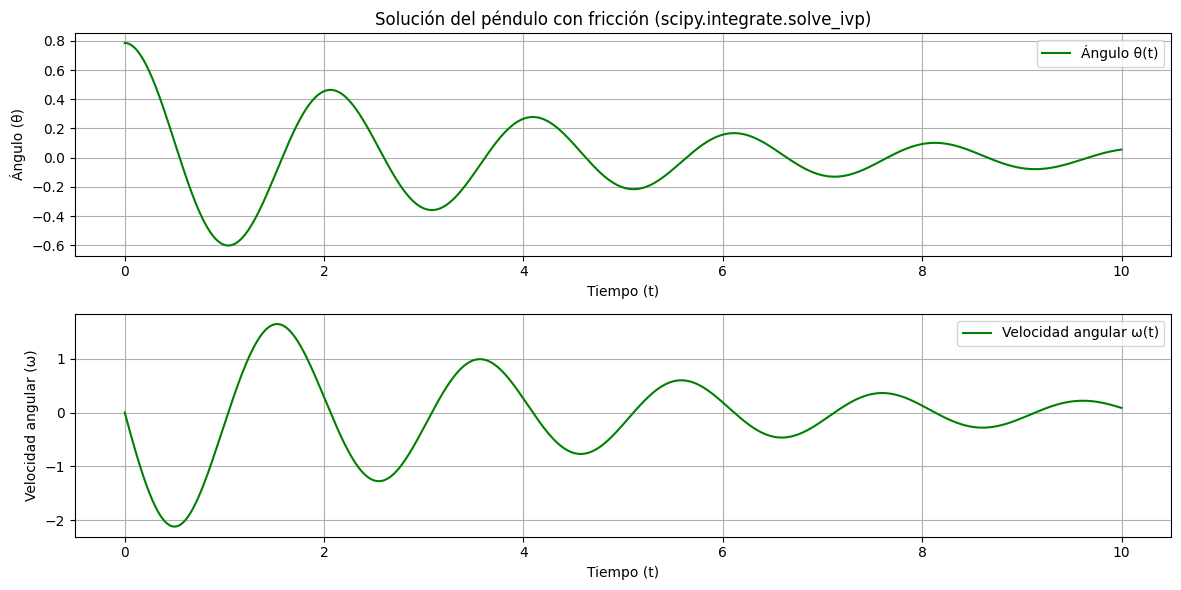

In [ ]:
from scipy.integrate import odeint

# adaptar pendulo
def pendulum_system(t, y):
    """
    y[0] = θ
    y[1] = ω
    dθ/dt = ω
    dω/dt = -(b/m) * ω - (g/L) * sin(θ)
    """
    b = 0.5  # mu
    m = 1.0  # masa
    g = 9.81  # gravedad
    L = 1.0  # longitud

    theta, omega = y # ¿?
    dtheta_dt = omega
    domega_dt = -(b/m) * omega - (g/L) * np.sin(theta)

    return [dtheta_dt, domega_dt]

y0 = [theta0, omega0]  # ci vector

tf = 10.0
t = np.linspace(t0, tf, n+1)

sol = odeint(pendulum_system, [t0, tf], y0, t_eval=t, method='RK45', rtol=1e-8, atol=1e-8)
t_ref = sol.t  # t
theta_ref = sol.y[0]  # θ(t)
omega_ref = sol.y[1]  # ω(t)

y0 = np.array([2, 0])
f = 2
omega = 2 * np.pi * f
alpha = 0.1
t = np.linspace(0, 3, 100)
params = (omega, alpha)

solucion = spi.odeint(oscilador, y0, t, args = params)

pos = solucion[:, 0]
vel = solucion[:, 1]

# GRÁFICA
plt.figure(figsize=(12, 6))

# θ vs t
plt.subplot(2, 1, 1)
plt.plot(t, theta_ref, label="Ángulo θ(t)", color='green')
plt.xlabel("Tiempo (t)")
plt.ylabel("Ángulo (θ)")
plt.title("Solución del péndulo con fricción (scipy.integrate.solve_ivp)")
plt.legend()
plt.grid(True)

# ω vs t
plt.subplot(2, 1, 2)
plt.plot(t, omega_ref, label="Velocidad angular ω(t)", color='green')
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad angular (ω)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

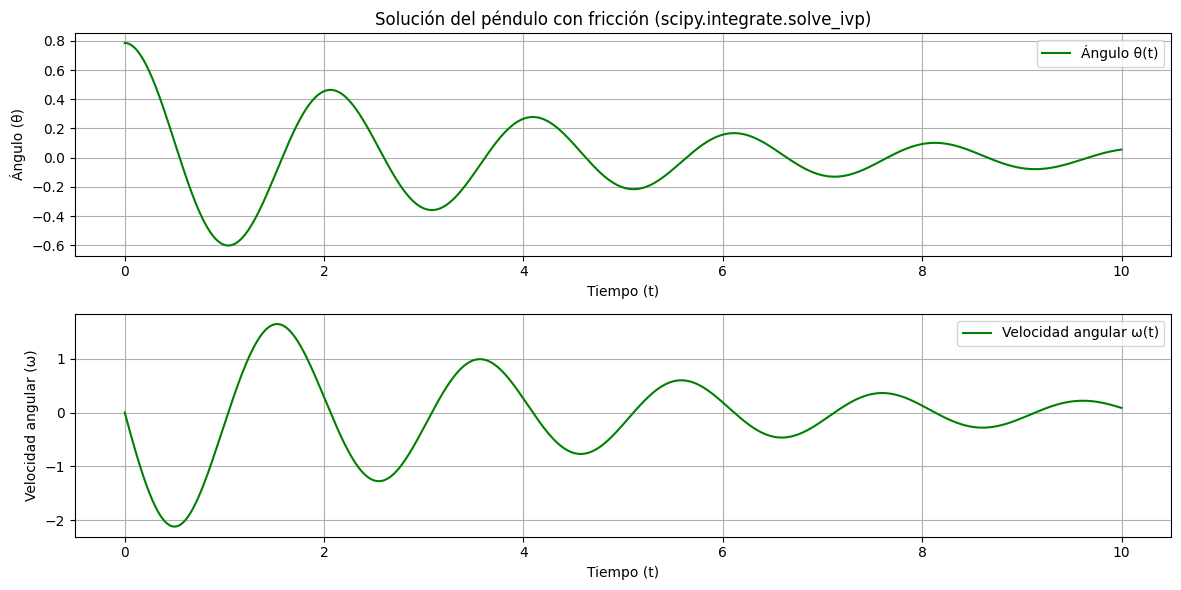

In [ ]:
from scipy.integrate import solve_ivp

# adaptar pendulo
def pendulum_system(t, y):
    """
    y[0] = θ
    y[1] = ω
    dθ/dt = ω
    dω/dt = -(b/m) * ω - (g/L) * sin(θ)
    """
    b = 0.5  # mu
    m = 1.0  # masa
    g = 9.81  # gravedad
    L = 1.0  # longitud

    theta, omega = y # ¿?
    dtheta_dt = omega
    domega_dt = -(b/m) * omega - (g/L) * np.sin(theta)

    return [dtheta_dt, domega_dt]

y0 = [theta0, omega0]  # ci vector

tf = 10.0
t = np.linspace(t0, tf, n+1)

sol = solve_ivp(pendulum_system, [t0, tf], y0, t_eval=t, method='RK45', rtol=1e-8, atol=1e-8)
t_ref = sol.t  # t
theta_ref = sol.y[0]  # θ(t)
omega_ref = sol.y[1]  # ω(t)

# GRÁFICA
plt.figure(figsize=(12, 6))

# θ vs t
plt.subplot(2, 1, 1)
plt.plot(t, theta_ref, label="Ángulo θ(t)", color='green')
plt.xlabel("Tiempo (t)")
plt.ylabel("Ángulo (θ)")
plt.title("Solución del péndulo con fricción (scipy.integrate.solve_ivp)")
plt.legend()
plt.grid(True)

# ω vs t
plt.subplot(2, 1, 2)
plt.plot(t, omega_ref, label="Velocidad angular ω(t)", color='green')
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad angular (ω)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Error

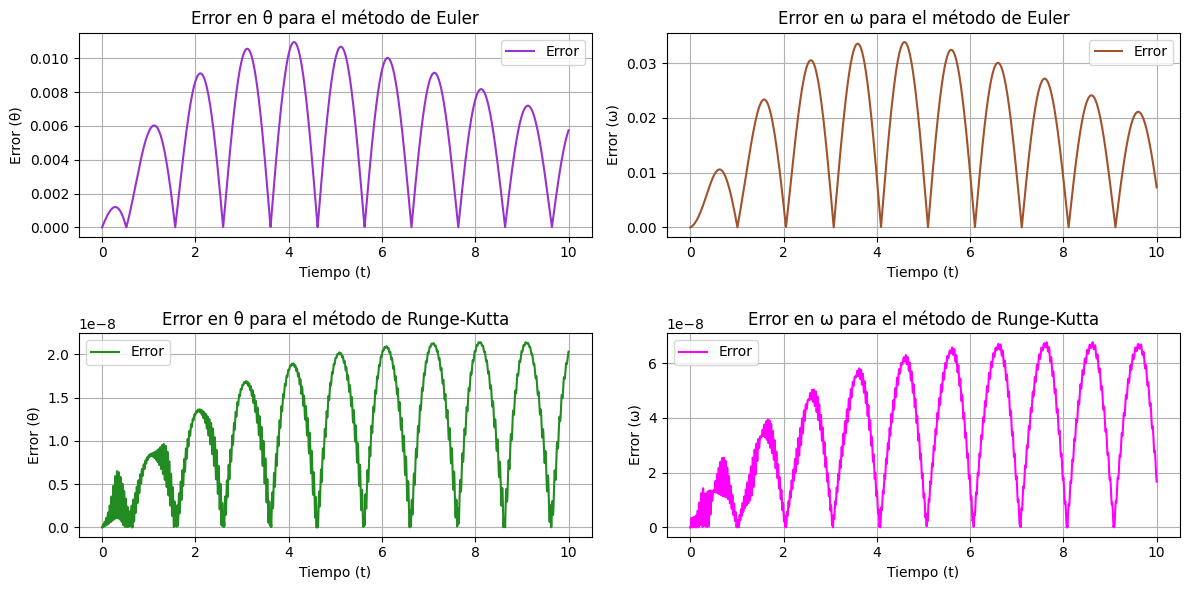

In [ ]:
# Errores
theta_error_euler = np.abs(theta_euler - np.interp(t, t_ref, theta_ref))
omega_error_euler = np.abs(omega_euler - np.interp(t, t_ref, omega_ref))

theta_error_rk = np.abs(theta_rk - np.interp(t, t_ref, theta_ref))
omega_error_rk = np.abs(omega_rk - np.interp(t, t_ref, omega_ref))

# GRÁFICA
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Euler: θ vs t
axs[0, 0].plot(t, theta_error_euler, color='darkorchid', label="Error")
axs[0, 0].set_title("Error en θ para el método de Euler")
axs[0, 0].set_ylabel("Error (θ)")
axs[0, 0].set_xlabel("Tiempo (t)")
axs[0, 0].grid(True)
axs[0, 0].legend()

# Euler:  ω vs t
axs[0, 1].plot(t, omega_error_euler, color='sienna', label="Error")
axs[0, 1].set_title("Error en ω para el método de Euler")
axs[0, 1].set_ylabel("Error (ω)")
axs[0, 1].set_xlabel("Tiempo (t)")
axs[0, 1].grid(True)
axs[0, 1].legend()

# Runge-Kutta: θ vs t
axs[1, 0].plot(t, theta_error_rk, color='forestgreen', label="Error")
axs[1, 0].set_title("Error en θ para el método de Runge-Kutta")
axs[1, 0].set_ylabel("Error (θ)")
axs[1, 0].set_xlabel("Tiempo (t)")
axs[1, 0].grid(True)
axs[1, 0].legend()

# Runge-Kutta:  ω vs t
axs[1, 1].plot(t, omega_error_rk, color='fuchsia', label="Error")
axs[1, 1].set_title("Error en ω para el método de Runge-Kutta")
axs[1, 1].set_ylabel("Error (ω)")
axs[1, 1].set_xlabel("Tiempo (t)")
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()